<h1>Neural Network Example: Handwriting Recognition</h1><br/>
Prepared by <a href="mailto:HELeMaster@my.harrisburgu.edu">Holly LeMaster</a><br/> 
Harrisburg University of Science and Technology<br />
Based on <i>Make your Own Neural Network</i> by T. Rashid

This notebook will demonstrate a simple neural network and utilize it to analyze writing samples. Based on a selection of hand-written numbers, the neural network will determine which digit they represent. <br /><br />

<b>Ensuring this notebook works correctly:</b><br />
Please make sure the directory of this notebook contains the following files:
<ul>
    <li><code>data</code> directory, containing dataset files</li>
    <li><code>media</code> directory, containing all images</li>
</ul>

You can download the training and test MNIST sets from the following links:
<ul>
    <li><a href="https://www.google.com/url?q=http://www.pjreddie.com/media/files/mnist_train.csv&sa=D&ust=1459380918475000&usg=AFQjCNHGH44RvgkyjB1suF264J4YLaXWJA">Training</a></li>
    <li><a href="https://www.google.com/url?q=http://www.pjreddie.com/media/files/mnist_test.csv&sa=D&ust=1459380918476000&usg=AFQjCNFmB73OHhZ9WaPrLzEdVw_bfBJG3Q">Testing</a></li>
</ul>

<br />
<i>© Tariq Rashid, 2016</i><br />
<i>GPLv2 license</i>

In [3]:
import numpy
import scipy.special as special
import matplotlib.pyplot as plt

%matplotlib inline

We begin by importing the necessary libraries. 

<code><font color="orange">numpy</font></code> is a scientific computing library with many useful functions for data manipulation. See the documentation <a href="https://docs.scipy.org/doc/numpy/">here</a>.

<code><font color="orange">scipy</font></code> is a scientific computing library. The documentation can be found <a href="https://docs.scipy.org/doc/scipy/reference/">here</a>. We use this library specifically for its special module, which includes a variety of useful pre-defined functions. In particular, we want the sigmoid function.

<code><font color="orange">matplotlib</font></code> provides graphing and plotting functionality. The documentation is <a href="https://matplotlib.org/contents.html">here</a>. We include <code>%matplotlib inline</code> to ensure the graphs are printed under code cells rather than opening in a separate window.

In [4]:
#NeuralNet class - representation of a basic neural network
class NeuralNet:
    #Initialize network
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes
        self.lr = learningRate
        
        #Init random link weight matricies
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        #Define anonymous activiation function using lambda shorthand
        self.activation = lambda x: special.expit(x)
        
    #train - trains the neural netwwork
    def train(self, inputsList, targetsList):
        #Convert inputs to 2d numpy array
        inputs = numpy.array(inputsList, ndmin=2).T
        targets = numpy.array(targetsList, ndmin=2).T
        
        #Calculate signals into hidden layer
        hiddenInputs = numpy.dot(self.wih, inputs)
        
        #Apply activation function to signals from hidden layer
        hiddenOutputs = self.activation(hiddenInputs)
        
        #Calculate signals into final output layer
        finalInputs = numpy.dot(self.who, hiddenOutputs)
        
        #Apply activation function to final outputs 
        finalOutputs = self.activation(finalInputs)
        
        #Calculate error: (target - actual)
        #output errors
        outputErrors = targets - finalOutputs
        
        #Backpropagate errors from output layer
        hiddenErrors = numpy.dot(self.who.T, outputErrors)
        
        #Update weights for links between the hidden and output layers
        self.who += self.lr * numpy.dot((outputErrors * finalOutputs * (1.0 - finalOutputs)), numpy.transpose(hiddenOutputs))
        
        #Update weights for links between input and hidden layers
        self.wih += self.lr * numpy.dot((hiddenErrors * hiddenOutputs * (1.0 - hiddenOutputs)), numpy.transpose(inputs))
        
    
    #query - queries the neural network
    #Takes input to neural network and returns network's output
    def query(self, inputsList):
        
        #Convert input list to 2d numpy array
        inputs = numpy.array(inputsList, ndmin=2).T
        
        #Use dot product matrix multiplication to calculate outputs
        #Combines all inputs with link weights to produce a matrix of combined moderated signals into each hidden layer node
        hiddenInputs = numpy.dot(self.wih, inputs)

        #Apply activation function to signals from hidden layer
        hiddenOutputs = self.activation(hiddenInputs)
        
        #Calculate signals into final output layer
        finalInputs = numpy.dot(self.who, hiddenOutputs)
        
        #Calculate signals from final output layer (apply act. func)
        finalOutputs = self.activation(finalInputs)
                
        return finalOutputs

Here we have implemented the neural network as a class. In its simplest form, a neural network accepts inputs, performs some function(s) on them, and returns an output. See <b>Figure 1</b> below, which depicts a single node from a neural network. Following the outputs, we calculate error and update link weights in the neural network to reflect changes we want to see. 

Links are the lines that connect the various nodes and each has a weight associated with it. We can adjust these weights to drive the learning of the network.

For a deeper dive into the inner-workings of a neural network, see the text this notebook is based on, <i>Build Your Own Neural Network</i>.

<img src="media/node.png">
<div align="center"><b>Figure 1:</b> Neural Network Node</div>

Note that we apply a sigmoid function to our calculations. The purpose of this is to make the calculations "fuzzy" - neural networks are designed to mimic neurons in organic creatures' brains, and the sigmoid function modulates results to imitate this.

Due to limitations with Jupyter, the entire class must be in one cell. A breakdown of each section of the class can be found below.

<h2>Class Breakdown</h2>

The class is initialized with input nodes, hidden nodes, output nodes, and a learning rate. The input nodes accept data and pass it to the inner "hidden" nodes, which pass their data to the output nodes. Each node applies functions to the data.

The learning rate is a parameter that determines how much link weights are adjusted. Lower values cause slower learning, while higher values accelerated it. It's necessary to find a good balance.

This last section of the constructor function initializes the link weights. Assignment is initially arbitrary and is adjusted later. We store these in <code>self.wih</code> (weight of links between input & hidden nodes) and <code>self.who</code> (weight of links between hidden & output nodes).

To close the constructor off, we define the activiation function we pulled from <code><font color='orange'>scipy</font></code> using Python's <code><font color='green'>lambda</font></code> function shorthand. You can read more about lambda <a href="https://www.w3schools.com/python/python_lambda.asp">here.</a>

The first function we define for the class is the training method. This function is what allows the neural network to learn. It accepts data, pushes it through the nodes, calculates error, and updates link weights. This is the core of our neural network.

The function takes a list of input values (training data) and a list of target values (our goals / class labels). Note that these are matricies of data, and we will utilize matrix arithmetic to perform calculations. Refer to the text to see in detail how these calculations work.

We begin by converting the arguments to 2D <code><font color='orange'>numpy</font></code> arrays using the <code><font color='green'>array</font></code> function. 

Now we perform the node calculations. We send the data through the input nodes and calculate the results sent to the hidden nodes. Since these are matricies, we use <code><font color='green'>dot</font></code> to calculate to dot product. 

Before the data can be considered output, we must apply the sigmoid activation function. We use the <code>self.activation</code> function we defined earlier and store those results in our hidden node outputs, <code>hiddenOutputs</code>.

We repeat the process with the output nodes, this time sending them the outputs from the hidden nodes. Dot product multiplication is used to calculate the values of the output nodes, and the activation function is applied to get he final outputs.

We now have a set of final outputs for our neural network! The next step is to determine the error and how the network can improve itself.

Calculating the error is key in improving our neural network. To do so, we compare the targets to the final outputs following the formula <code>error = (targets - actual)</code>. We store this in <code>outputErrors</code> to be used in backpropagation.

Backpropagation is used to determine the error of nodes that are in the middle layers. Since we only compare our target values with the final outputs, we get no feedback on the performance of the middle layer, the hidden nodes. Backpropagation allows us to calculate the error for those layers using the error of the final layer.

We take the dot product of the matricies containing the hidden-output layer links and the output layer errors. This gives us error for the hidden layer. 

For more detailed information on backpropagation, refer to the text.

Now that we have the error measures, we need to use these to update the link weights of the neural network. We first modify the hidden-output layer link weights, and then move on to the hidden-input layer links. The equation for this is as follows:

<img src="media/weightUpdate.png">
<div align="center"><b>Figure 2:</b> Link Weight Update Equation</div>

where <i>j</i> is a node in the current layer, <i>k</i> is a node in the next layer, $\alpha$ is the learning rate, <i>E</i> is error, <i>W</i> refers to the weights, and <i>O</i> represents output signals. This equation is translated into our code.

The last function of the neural network is responsible for accepting input and returning output. Essentially, this is where all the processing is done. The function takes inputs in the form of a list.

First, the input list is transformed into a 2D <code><font color='orange'>numpy</font></code> array. Next, the outputs of the hidden layer are calculated using matrix multiplication. The activation function is applied to those outputs. We then send the outputs from the hidden layer to the final layer using the same calculations. These final outputs are then returned. 

That concludes the neural network class! We can adapt this simple class for a variety of applications.

<h2>Initialization and Training</h2> 

Now that the neural network is implemented, we can test its power on a handwriting recognition application. In this case, we'll use the MNIST database, a dataset that contains handwritten numbers. 

MNIST is a freely-available dataset that contains 60,000 labeled examples of handwritten numbers. By labeled, we mean that the desired output (the target) comes along with the records. We'll be using the dataset in the CSV format, a plain-text file of comma-separated values.

Let's take a look at one line from the dataset:

<code>5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,186,253,253,150,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,93,252,253,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249,253,249,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,130,183,253,253,207,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,148,229,253,253,253,250,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,114,221,253,253,253,253,201,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,66,213,253,253,253,253,198,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,171,219,253,253,253,253,195,80,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,172,226,253,253,253,253,244,133,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,253,253,253,212,135,132,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
</code>

While it looks overwhelming, it's easy to break down. The first number of the record, <code>5</code>, is our target. This means that the array of numbers we see here represents a five. The remaining numbers are pixels values for a handwritten digit image. The image is a 28x28 pixel array (784 individual values). The higher the number, the darker that pixel is.

We can plot this data with <code><font color='orange'>matplotlib</font></code> to get a better idea of what the data represents.

In [6]:
#Import data
trainingDataFile = open("data/mnist_train.csv", "r")
trainingData = trainingDataFile.readlines()
trainingDataFile.close()

Before plotting, we import the necessary data. The MNIST data is imported from the CSV using Python file opening commands.

We read the data from the file into the <code>trainingData</code> variable and finish by closing the file.

Text(0.5,1,'Class label: 5')

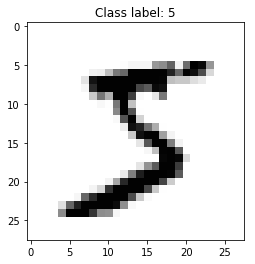

In [16]:
#Visualize data
allValues = trainingData[0].split(',')   #Splits long records by commas into a Python list
imageArray = numpy.asfarray(allValues[1:]).reshape(28, 28)

plt.imshow(imageArray, cmap='Greys', interpolation='None')

plt.title("Class label: " + str(allValues[0]))

We first extract one record from the training data and split it into a list. This list is then transformed into a 28x28 <code><font color='orange'>numpy</font></code> array using <code><font color='green'>reshape</font></code>. 

We can plot the array as an image using <code><font color='orange'>pyplot</font></code>'s <code><font color='green'>imshow</font></code> function. As we can see, the result is a handwritten five!

To see other digits, try modifying the index value in <code>trainingData[0]</code>.

In [17]:
#Create instance of the neural network
#Define arguments
inputNodes = 784   
hiddenNodes = 100  
outputNodes = 10    
learningRate = 0.3   

classifier = NeuralNet(inputNodes, hiddenNodes, outputNodes, learningRate)

Now that we have an idea of what our data looks like, we can begin building the neural network. We want the network to scan an image and produce the correct class label. 

<ul>
    <li><code>inputNodes</code> is set to 784, since we have 784 "pixels" in the input image</li>
    <li><code>hiddenNodes</code> is set to 100, an arbitrary number. We chose 100 since it is between 10 and 784.</li>
    <li><code>outputNodes</code> is set to 10. Since the possible class labels are the digits 0 through 9, there needs to be one output node per result.</li>
    <li><code>learningRate</code> is set to an arbitrary value of 0.3. This can later be adjusted for more accuracy, if desired.</li>
</ul>

After setting all the variables we create the classifier from our neural network class.

This can be hard to visualize at first. Essentially, we are sending the array of pixels through the input nodes, one for each pixel. Then, calculations are applied to the nodes and they are sent through the 100 hidden nodes. Finally, the results of those nodes are sent through the 10 output nodes, one for each digit. Of the 10 nodes, whichever has the highest value is the prediction.

<img src="media/output.png">
<div align="center"><b>Figure 3:</b> Output Node Interpretation </div>

In the figure above, we can see that for the training instance <code>5</code>, the neural network's node for 5 has the highest value. Therefore, the network guesses the digit is five. Notice that with <code>9</code>, <code>4</code> also has an elevated value. Since 9s and 4s can look similar, the neural network predicted that it could be a four, but is most likely a nine. Here we can see that "fuzzy logic" in action!

In [18]:
#Scale + split data and train neural network
for record in trainingData:
    #Split by commas
    allValues = record.split(',')
    
    #Scale inputs
    inputs = (numpy.asfarray(allValues[1:]) / 255.0 * 0.99) + 0.01
    
    #Create target output values
    targets = numpy.zeros(outputNodes) + 0.01
    targets[int(allValues[0])] = 0.99  #Class label
    
    classifier.train(inputs, targets)

Now we can begin training the neural network. We begin by iterating through all records in <code>trainingData</code>.

First, we split the values in the record into a list. After this, we scale them between 0.01 and 1. In their original form, values in the records range from 0 to 255. Scaling them down makes the values much easier to work with.

Following this, we extract our class labels and store them in <code>targets</code>. <code><font color='green'>zeros</font></code> fills the array with zeros, and we add 0.01 to avoid issues with multiplication by 0. Then, we convert the class label from a string to an integer.

Finally, we train our classifier by using the <code><font color='green'>train</font></code> function, sending the inputs (images) and the class labels (target digits).

When running the code, you may notice that nothing appears to happen. Training the classifier itself does not produce output, but we can verify the performance of the classifier to see the results.

<h2>Testing and Verification</h2>

In [19]:
#Import test data
testDataFile = open("data/mnist_test.csv", "r")
testData = testDataFile.readlines()
testDataFile.close()

We start by importing the testing portion of the dataset.

In [22]:
#Perform test
score = [] #scorecard for network performance

for record in testData:
    #Split record
    allValues = record.split(',')
    
    #Separate class label
    correctLabel = int(allValues[0])
    
    #Scale inputs
    inputs = (numpy.asfarray(allValues[1:]) / 255.0 * 0.99) + 0.01
    
    #Query neural network
    outputs = classifier.query(inputs)
    
    #Retrieve index of highest value corresponding to class label
    label = numpy.argmax(outputs)

    #Check accuracy
    if(label == correctLabel):
        score.append(1)
    else:
        score.append(0)
        

To get an idea of how well the classifier performed, we can calculate accuracy scores. We can store this in an array called <code>score</code>. 

We iterate through each record of the testing data, splitting and scaling the data just like before. We also make sure to separate out the class label and store that in <code>correctLabel</code>.

Using the <code>query</code> function of our neural network, we send the test data record as input to the classifier. This is stored in <code>output</code>. Knowing that the output node with the highest value is the prediction, we retrieve this value and store it in <code>label</code>. <code><font color='orange'>numpy</font></code>'s <code><font color='green'>argmax</font></code> easily retrieves that value from the output node list.

To finish, we compare the predicted label with the correct label. If they match, we append 1 to <code>score</code>, and if not, we append 0.

In [21]:
#Calculate accuracy
scoreArray = numpy.asarray(score)
print("Accuracy = " + str(100*(scoreArray.sum() / scoreArray.size)) + '%')

Accuracy = 94.69999999999999%


Using the <code>score</code> array, we can calculate a final accuracy percentage. We simply average the scores and display the result as a percentage.

On this run, the classifier has an accuracy of 94.70%. That's great! As you can see, even a simple neural network can get great results. The class we created can be adapated for numerous applications, and can even be further improved for better accuracy.

For example, we can tweak the learning rate of the network and compare accuracies with each run.

<img src="media/learningRate.png">
<div align="center"><b>Figure 3:</b> Accuracy with Different Learning Rates </div>

We can see that a learning rate that's too high or too low decreases the accuracy of the system. It seems that 0.2 is a good rate. Try adjusting the learning rate above (where the classifier is created) and see how the accuracy changes.

For more information about improving this neural network's efficiency and accuracy, see the third chapter of <i>Make Your Own Neural Network</i>. 
<br /><br /><br />
<font size="2px">
All images and code adapted from Rashid, T. (2016). <i>Make your own neural network.</i> North Charleston, SC: CreateSpace Independent Publishing.
</font>